<a href="https://colab.research.google.com/github/Haaris-Sayyed/Iris-Flower-Dataset-Classification/blob/main/Iris_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading dataset

In [ ]:
dataset=pd.read_csv('Iris.csv')
dataset=dataset.drop(columns=['Id'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Display stats about data

In [ ]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Display basic info about datatype

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## To display no. of samples on each class

In [ ]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Preprocessing dataset

In [ ]:
# check null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory data analysis

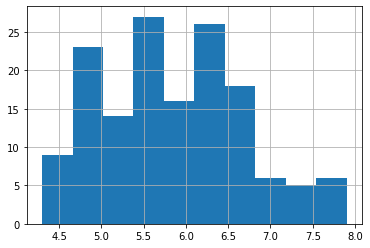

In [ ]:
dataset['SepalLengthCm'].hist()

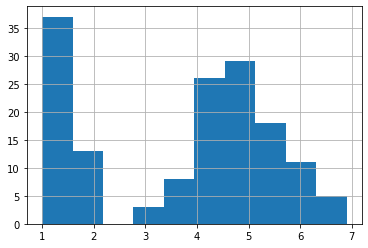

In [ ]:
dataset['PetalLengthCm'].hist()

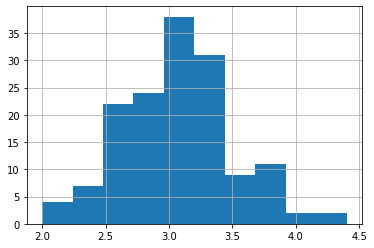

In [ ]:
dataset['SepalWidthCm'].hist()

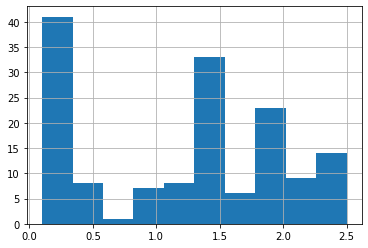

In [ ]:
dataset['PetalWidthCm'].hist()

In [ ]:
#scatterplot
col=['red','green','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

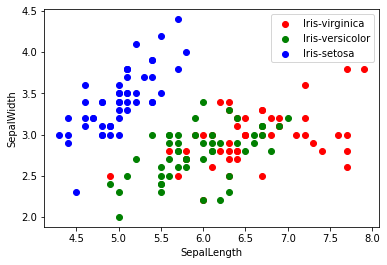

In [ ]:
for i in range(3):
  x=dataset[dataset['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=col[i],label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

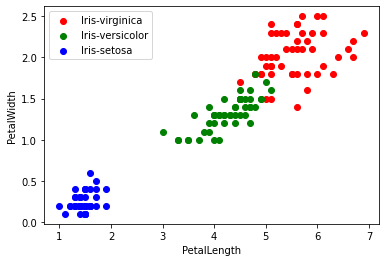

In [ ]:
for i in range(3):
  x=dataset[dataset['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=col[i],label=species[i])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

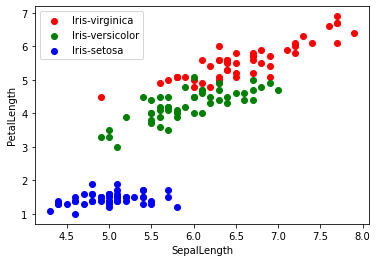

In [ ]:
for i in range(3):
  x=dataset[dataset['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=col[i],label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

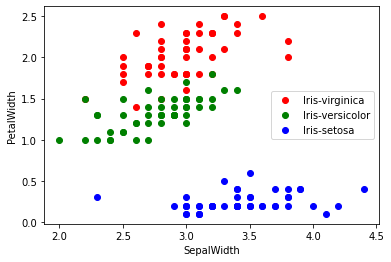

In [ ]:
for i in range(3):
  x=dataset[dataset['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=col[i],label=species[i])
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.legend()

## Showing Co-relations among variables

In [ ]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


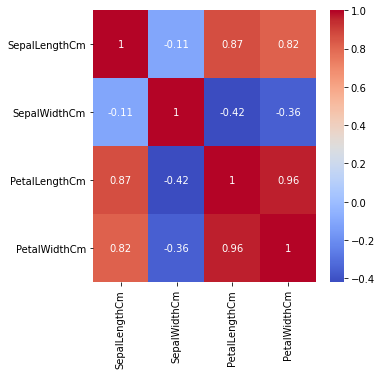

In [ ]:
corr=dataset.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
dataset['Species']=le.fit_transform(dataset['Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['Species'])
y=dataset['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model1.score(x_test,y_test)*100

91.11111111111111

## K-Nearest Neighbours Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model2.score(x_test,y_test)*100

95.55555555555556

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model3.score(x_test,y_test)*100

95.55555555555556

## Kernal SVM

In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'rbf', random_state = 0)
model4.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
model4.score(x_test,y_test)*100

91.11111111111111

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model5.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model5.score(x_test,y_test)*100

93.33333333333333

## Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model6.score(x_test,y_test)*100

93.33333333333333